# Friendship at school
In this notebook we analize the networks of students belonging to different types of schools, calculating various metrices and tools. Additional information about everything is provided in the projext report.<br>
By:
- Guglielmo Biagini
- Elisa Castagnari
- Matteo Fusconi
- Luca Trambaiollo


 #### setup

In [114]:
try:
  import google.colab
  !git clone https://github.com/MatteoFusconi/Social-Network-Analysis.git
  data_folder = './Social-Network-Analysis/data/'
  img_folder = './Social-Network-Analysis/images/'
except ImportError:
  data_folder = './data/'
  img_folder = './images/'
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd
import os

In [115]:
from matplotlib.cm import ScalarMappable
from matplotlib.colors import Normalize

def print_k_cores(G):
 G_1_core = nx.k_core(G, k= 1)
 G_2_core = nx.k_core(G, k= 2)
 G_3_core = nx.k_core(G, k= 3)

 k_mask = []
 for i in G.nodes():
  if i in G_3_core.nodes():
    k_mask.append(3)
  elif i in G_2_core.nodes():
    k_mask.append(2)
  elif i in G_1_core.nodes():
    k_mask.append(1)
  else:
    k_mask.append(0)
 print(k_mask)


 cmap = plt.get_cmap('Reds')
 norm = Normalize(vmin=0, vmax=4)
 sm = ScalarMappable(cmap=cmap, norm=norm)
 sm.set_array([])

 # Create a mapping between k-cores to colors
 color_legend = {0: '0-core', 1: '1-core', 2: '2-core', 3: '3-core'}

 # Assign a color based on the core
 node_colors = [cmap(norm(k)) for k in k_mask]

 # Draw the graph with node colors
 pos = nx.spring_layout(G)  # You can choose a different layout if desired
 nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

 # Create a custom legend
 legend_labels = {v: k for k, v in color_legend.items()}
 legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(norm(legend_labels[label])), markersize=10, label=label) for label in color_legend.values()]

 plt.legend(handles=legend_handles, title='k-cores', loc='upper left')

 plt.show()

## Primary School

In [116]:
input_file = data_folder + 'primary_data.txt'

## Middle School

In [117]:
input_adjacency = data_folder + 'middle_adjacency.txt'
input_metadata = data_folder + 'middle_metadata.txt'

adjacency_df = pd.read_csv(input_adjacency, sep= "  ", names= np.arange(26))

adjacency_matrix = adjacency_df.values
print(adjacency_matrix.shape)

(26, 26)


C:\Users\fusco\AppData\Local\Temp\ipykernel_27212\1782527322.py:4: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  adjacency_df = pd.read_csv(input_adjacency, sep= "  ", names= np.arange(26))


In [118]:
# treat missing values (==9) as non-friendships
adjacency_matrix[adjacency_matrix == 9] = 0
# remove values from diagonal
for i in range(26):
  adjacency_matrix[i,i] = 0
assert((adjacency_matrix.diagonal() == 0).all())

MIDDLE_DIRECTED_adj = adjacency_matrix
MIDDLE_UNDIRECTED_adj = adjacency_matrix * adjacency_matrix.T

In [119]:
# create directed and undirected graphs
G_middle_undirected = nx.from_numpy_array(MIDDLE_UNDIRECTED_adj)
G = G_middle_undirected
G_middle_directed = nx.DiGraph(MIDDLE_DIRECTED_adj)
GG = G_middle_directed

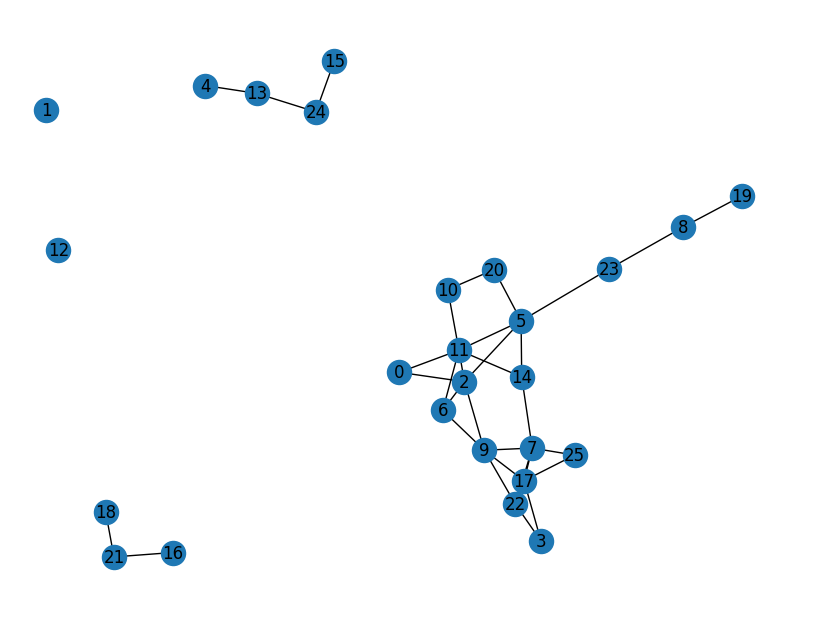

In [120]:
pos = nx.spring_layout(G_middle_undirected, k= 0.3)
plt.figure(figsize= (8,6))
nx.draw(G_middle_undirected, pos, with_labels = True)
plt.savefig(img_folder+"middle_undirected")

In [121]:
# Read the attributes from an input file
input_file = './data/middle_metadata.txt'
node_id = 0

node_attributes = []

def binarize_alcohol(n):
  if 1<= n <= 2:
    return 0
  else:
    return 1

def binarize_religion(n):
  if n == 1 or n == 3:
    return 1
  else:
    return 0

def binarize_delinquency(n):
  if n == 1:
    return 0
  else:
    return 1

with open(input_file, 'r') as file:
    for line in file:
        parts = line.strip().split()
        if len(parts) == 6:
            sex, age, ethnicity, religion, alcohol, delinquency = int(parts[0]), int(parts[1]), int(parts[2]), int(parts[3]), int(parts[4]), int(parts[5])
            node_attributes.append({'sex': sex,
                                    'age': age,
                                    'ethnicity': ethnicity,
                                    'religion': binarize_religion(religion),
                                    'alcohol': binarize_alcohol(alcohol),
                                    'delinquency': binarize_alcohol(delinquency)})



# Set the attributes for nodes in the graph
node_ids = list(G.nodes)  # Assuming node IDs correspond to node order in the input file

for i, node_id in enumerate(node_ids):
    attributes = node_attributes[i]
    nx.set_node_attributes(G, {node_id: attributes})

# Example: Print attributes for a specific node (e.g., node with ID 1)
node_id = 9
attributes = G.nodes[node_id]
print(attributes)
print(f"Node {node_id} attributes - Sex: {attributes['sex']}, Age: {attributes['age']}, Ethnicity: {attributes['ethnicity']}, Religion: {attributes['religion']}, Alcohol: {attributes['alcohol']}, Delinquency: {attributes['delinquency']}")

{'sex': 1, 'age': 12, 'ethnicity': 1, 'religion': 1, 'alcohol': 0, 'delinquency': 0}
Node 9 attributes - Sex: 1, Age: 12, Ethnicity: 1, Religion: 1, Alcohol: 0, Delinquency: 0


In [122]:
G.nodes[12]

{'sex': 2,
 'age': 13,
 'ethnicity': 1,
 'religion': 0,
 'alcohol': 0,
 'delinquency': 0}

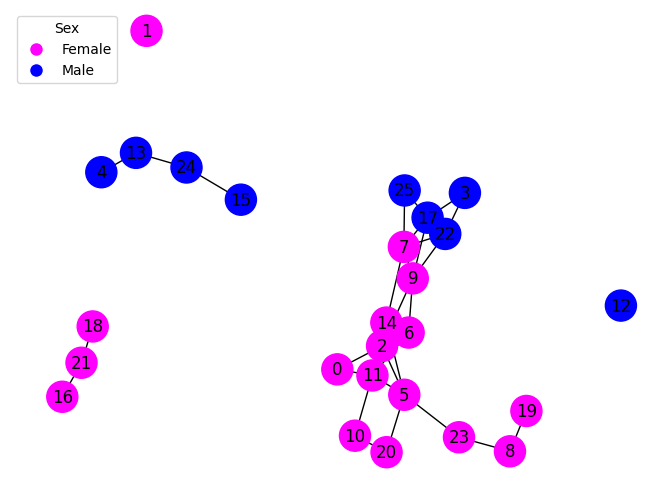

In [123]:
# Create a mapping of 'sex' attribute values to colors
color_map = {1: 'magenta', 2: 'blue'}
color_legend = {1: 'Female', 2: 'Male'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['sex']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G, k= 0.3)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Sex', loc='upper left')

plt.show()

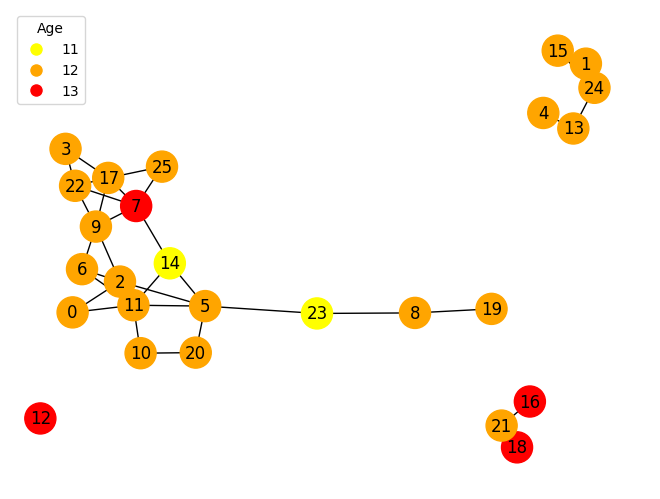

In [124]:
# Create a mapping of 'age' attribute values to colors
color_map = {11: 'yellow', 12: 'orange', 13: 'red'}
color_legend = {11: '11', 12: '12', 13: '13'}

# Extract the 'age' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['age']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G, k= 0.3)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Age', loc='upper left')

plt.show()

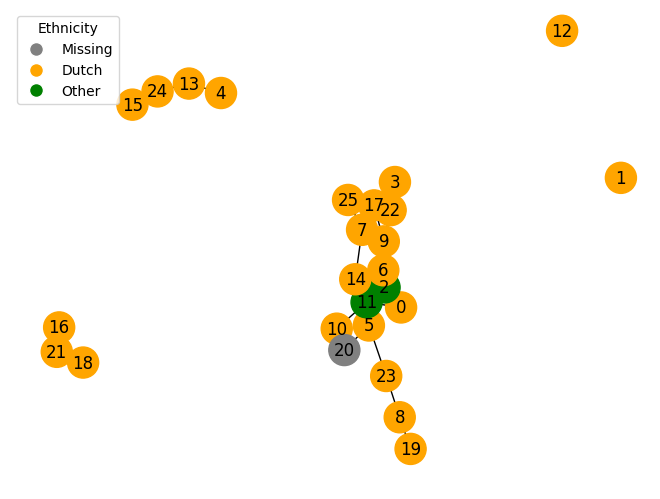

In [125]:
# Create a mapping of 'ethnicity' attribute values to colors
color_map = {0: 'gray', 1: 'orange', 2: 'green'}
color_legend = {0: 'Missing', 1: 'Dutch', 2: 'Other'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['ethnicity']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Ethnicity', loc='upper left')

plt.show()

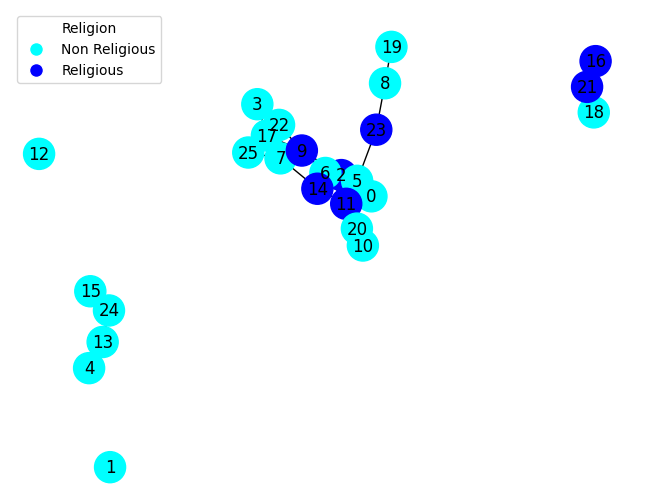

In [126]:
# Create a mapping of 'religion' attribute values to colors
color_map = {0: 'cyan', 1: 'blue'}
color_legend = {0: 'Non Religious', 1: 'Religious'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['religion']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Religion', loc='upper left')

plt.show()


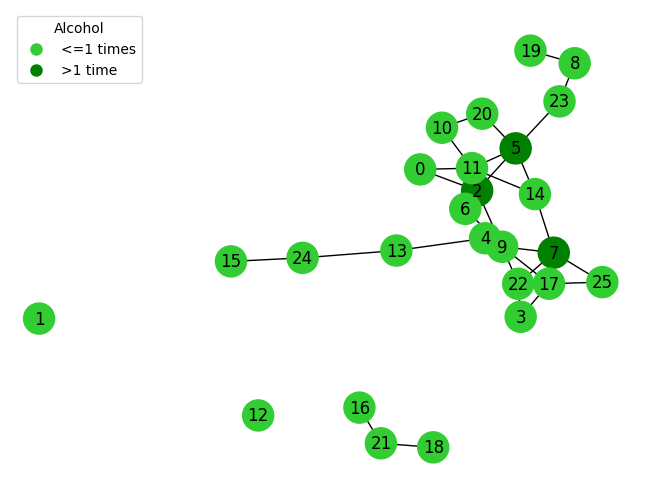

In [127]:
# Create a mapping of 'religion' attribute values to colors
color_map = {0: 'limegreen', 1: 'green'}
color_legend = {0: '<=1 times', 1: '>1 time'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['alcohol']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G, k= 0.3)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Alcohol', loc='upper left')

plt.show()

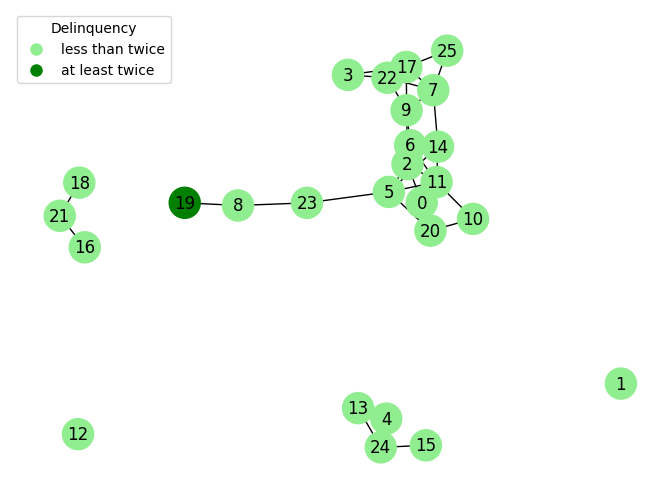

In [128]:
# Create a mapping of 'religion' attribute values to colors
color_map = {0: 'lightgreen', 1: 'green'}
color_legend = {0: 'less than twice', 1: 'at least twice'}

# Extract the 'sex' attribute for each node and assign a color based on the attribute
node_colors = [color_map[G.nodes[node]['delinquency']] for node in G.nodes()]

# Draw the graph with node colors
pos = nx.spring_layout(G, k= 0.3)  # You can choose a different layout if desired
nx.draw(G, pos, with_labels=True, node_color=node_colors, node_size=500, font_size=12)

# Create a custom legend
legend_labels = {v: k for k, v in color_legend.items()}
legend_handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=color_map[legend_labels[label]], markersize=10, label=label) for label in color_legend.values()]
plt.legend(handles=legend_handles, title='Delinquency', loc='upper left')

plt.show()

In [129]:
# Calculate the total mean of the edges in the graph based on their presence
total_edge_count = G.number_of_edges()
total_node_count = G.number_of_nodes()

if total_node_count > 0:
    total_mean_edge_count = total_edge_count / total_node_count
else:
    total_mean_edge_count = 0

print(f"Total Mean Edge Count for the Graph: {total_mean_edge_count}")

Total Mean Edge Count for the Graph: 1.2692307692307692


In [130]:
# Calculate the Jaccard coefficient for all pairs of nodes (measure of the similarity)
jaccard_coefficients = list(nx.jaccard_coefficient(G))

# Print the Jaccard coefficients for each pair of nodes
for u, v, coef in jaccard_coefficients:
    if coef != 0:
        print(f"Jaccard coefficient between nodes {u} and {v}: {coef}")

Jaccard coefficient between nodes 0 and 5: 0.4
Jaccard coefficient between nodes 0 and 6: 0.6666666666666666
Jaccard coefficient between nodes 0 and 9: 0.16666666666666666
Jaccard coefficient between nodes 0 and 10: 0.3333333333333333
Jaccard coefficient between nodes 0 and 14: 0.25
Jaccard coefficient between nodes 2 and 7: 0.1111111111111111
Jaccard coefficient between nodes 2 and 10: 0.16666666666666666
Jaccard coefficient between nodes 2 and 14: 0.3333333333333333
Jaccard coefficient between nodes 2 and 17: 0.1111111111111111
Jaccard coefficient between nodes 2 and 20: 0.16666666666666666
Jaccard coefficient between nodes 2 and 22: 0.125
Jaccard coefficient between nodes 2 and 23: 0.16666666666666666
Jaccard coefficient between nodes 3 and 7: 0.4
Jaccard coefficient between nodes 3 and 9: 0.4
Jaccard coefficient between nodes 3 and 25: 0.3333333333333333
Jaccard coefficient between nodes 4 and 24: 0.5
Jaccard coefficient between nodes 5 and 6: 0.3333333333333333
Jaccard coefficient

In [131]:
# Function to calculate homophily for a given attribute (e.g., 'gender')
def calculate_homophily(graph, attribute):
    same_count = 0
    total_count = 0

    for u, v in graph.edges():
        if graph.nodes[u][attribute] == graph.nodes[v][attribute]:
            same_count += 1
        total_count += 1

    if total_count > 0:
        homophily = same_count / total_count
    else:
        homophily = 0.0

    return homophily

# Calculate homophily for the 'gender' attribute

attribute_name = 'delinquency'
homophily_value = calculate_homophily(G, attribute_name)

print(f'Homophily for {attribute_name}: {homophily_value}')

Homophily for delinquency: 0.9696969696969697


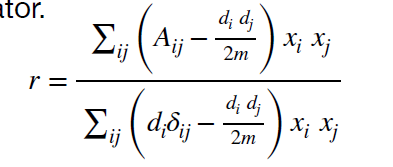

In [142]:
G.nodes[22]

{'sex': 2,
 'age': 12,
 'ethnicity': 1,
 'religion': 0,
 'alcohol': 0,
 'delinquency': 0}

In [157]:
def calculate_homophily(G, attribute):
    A = nx.to_numpy_array(G)
    d = np.array(nx.degree(G))
    x = lambda i: G.nodes[i][attribute]
    delta = lambda i, j: int(G.nodes[i][attribute] == G.nodes[j][attribute])
    m = len(G.edges)
    np.sum([(A[i,j] - d[i]*d[j]/2/m)*x(i)*x(j) for i in range(len(A)) for j in range(len(A) )])

    homophily_value = np.sum([(A[i,j] - d[i]*d[j]/2/m)*x(i)*x(j) for i in range(len(A)) for j in range(len(A) )]) /     \
                        np.sum([(d[i] * delta(i,j) - d[i]*d[j]/2/m)*x(i)*x(j) for i in range(len(A)) for j in range(len(A) )])
    return homophily_value

{0: 0.32,
 1: 0.32,
 2: 0.64,
 3: 0.36,
 4: 0.12,
 5: 0.72,
 6: 0.4,
 7: 0.64,
 8: 0.16,
 9: 0.76,
 10: 0.36,
 11: 0.64,
 12: 0.28,
 13: 0.32,
 14: 0.32,
 15: 0.16,
 16: 0.08,
 17: 0.44,
 18: 0.12,
 19: 0.16,
 20: 0.4,
 21: 0.24,
 22: 0.36,
 23: 0.28,
 24: 0.24,
 25: 0.52}

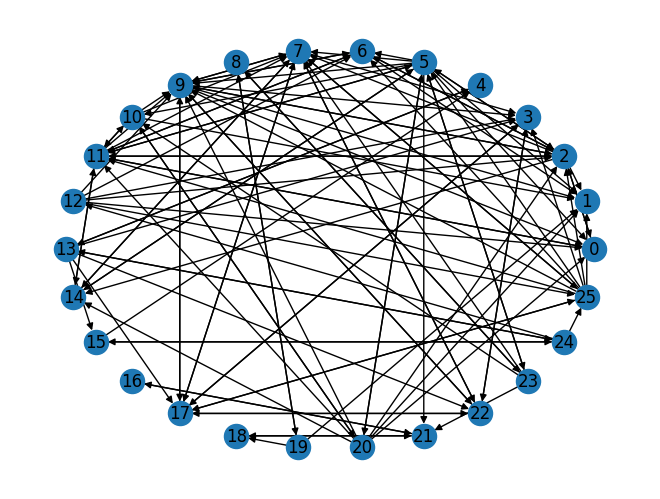

In [ ]:
nx.draw_circular(GG, with_labels = True)

nx.degree_centrality(GG)

In [ ]:
nx.in_degree_centrality(GG)

{0: 0.24,
 1: 0.32,
 2: 0.32,
 3: 0.28,
 4: 0.08,
 5: 0.24,
 6: 0.24,
 7: 0.4,
 8: 0.08,
 9: 0.44,
 10: 0.16,
 11: 0.32,
 12: 0.04,
 13: 0.08,
 14: 0.2,
 15: 0.08,
 16: 0.04,
 17: 0.24,
 18: 0.08,
 19: 0.04,
 20: 0.08,
 21: 0.16,
 22: 0.2,
 23: 0.08,
 24: 0.08,
 25: 0.16}

In [ ]:
nx.out_degree_centrality(GG)

{0: 0.08,
 1: 0.0,
 2: 0.32,
 3: 0.08,
 4: 0.04,
 5: 0.48,
 6: 0.16,
 7: 0.24,
 8: 0.08,
 9: 0.32,
 10: 0.2,
 11: 0.32,
 12: 0.24,
 13: 0.24,
 14: 0.12,
 15: 0.08,
 16: 0.04,
 17: 0.2,
 18: 0.04,
 19: 0.12,
 20: 0.32,
 21: 0.08,
 22: 0.16,
 23: 0.2,
 24: 0.16,
 25: 0.36}

In [ ]:
nx.transitivity(GG)

0.42138364779874216

[2, 0, 3, 2, 1, 3, 3, 3, 1, 3, 2, 3, 0, 1, 3, 1, 1, 3, 1, 1, 2, 1, 3, 1, 1, 2]


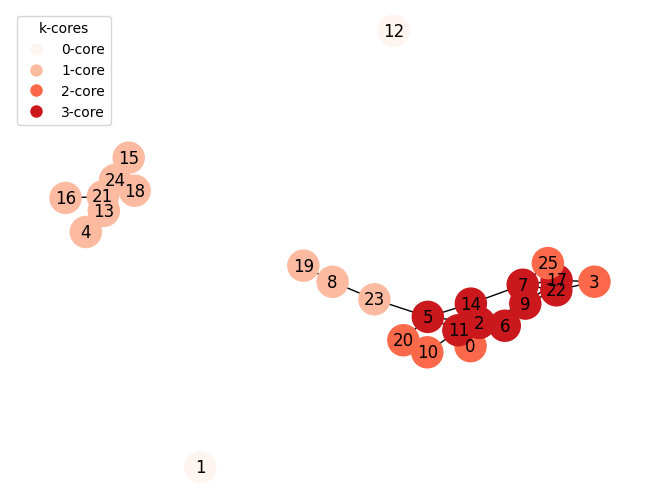

In [ ]:
print_k_cores(G)

## High School

In [ ]:
input_file = data_folder + 'high_data.csv'
contacts = pd.read_csv(input_file, sep= " ", names= ["IDcontact", "ID1", "ID2", "Class1", "Class2"])
np.sort(pd.unique(contacts["ID1"]))

array([   1,    3,    4,    9,   14,   15,   20,   21,   27,   28,   32,
         34,   38,   39,   41,   45,   46,   47,   48,   54,   55,   58,
         61,   62,   63,   65,   70,   71,   72,   79,   80,   85,   87,
         89,   90,   92,  101,  103,  106,  111,  115,  116,  117,  119,
        120,  122,  124,  125,  131,  132,  134,  145,  147,  149,  151,
        156,  159,  160,  165,  170,  171,  172,  173,  176,  177,  179,
        181,  184,  185,  190,  194,  196,  199,  200,  201,  202,  205,
        209,  210,  211,  213,  214,  219,  220,  222,  226,  227,  232,
        236,  239,  240,  241,  242,  243,  245,  246,  248,  252,  253,
        254,  255,  256,  257,  258,  265,  267,  268,  269,  272,  274,
        275,  276,  277,  279,  280,  285,  290,  295,  306,  311,  312,
        322,  325,  327,  333,  335,  339,  343,  346,  353,  356,  364,
        366,  372,  374,  376,  382,  387,  388,  390,  391,  400,  407,
        413,  420,  424,  425,  428,  429,  434,  4

## University